In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [8]:
#Чтение данных их файла
data = pd.read_csv(r"М.Тех_Данные_к_ТЗ_DS.csv", encoding = 'cp1251', sep='\,')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
/var/folders/v9/v_nbgkn13pz7tqtfgystm4dh0000gn/T/ipykernel_53363/1492975695.py:2: SyntaxWarning: invalid escape sequence '\,'
  data = pd.read_csv(r"М.Тех_Данные_к_ТЗ_DS.csv", encoding = 'cp1251', sep='\,')
/var/folders/v9/v_nbgkn13pz7tqtfgystm4dh0000gn/T/ipykernel_53363/1492975695.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(r"М.Тех_Данные_к_ТЗ_DS.csv", encoding = 'cp1251', sep='\,')


,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""


In [9]:
#Преобразование данных - удаление "
data.columns = data.columns.str.replace('\"','')
data= data.applymap(lambda x: str(x).replace('\"', ''))
#Преобразование данных
data['Количество больничных дней'] = data['Количество больничных дней'].astype('int')
data['Возраст'] = data['Возраст'].astype('int')
data.head()

/var/folders/v9/v_nbgkn13pz7tqtfgystm4dh0000gn/T/ipykernel_53363/902126178.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data= data.applymap(lambda x: str(x).replace('\"', ''))


,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [10]:
#Информция о типах данных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [16]:
# Визуализация графиков и описательной статистики
def distplot_stat(x,y, title_x, title_y):
    # Визуализация графиков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    sns.histplot(x, kde=True, ax=axes[0])
    axes[0].set_title(f'Распределение для {title_x}')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')


    sns.distplot(y, kde=True, color='salmon', ax=axes[1])
    axes[1].set_title(f'Распределение для {title_y}')
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')


    plt.tight_layout()
    plt.show()

    # Описательная статистика
    print('Описательнпая статистика выборок:\n')
    print(f'{title_x}\n',x.describe(),'\n')
    print(f'{title_y}\n',y.describe())

# Проведение U-теста и оценка статистической значимости
def U_test(x,y,alpha):
    # Проведение U-теста
    statistic, p_value = mannwhitneyu(x, y)
    print(f"Статистика U: {statistic}")
    print(f"P-значение: {p_value}")

    # Оценка статистической значимости
    print(f'Уровень значимости: {alpha}')
    if p_value < alpha:
        print("Различие является статистически значимым - гипотеза принимается.")
    else:
        print("Нет статистически значимого различия между выборками - гипотеза отвергается.")


## Гипотеза 1

Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

In [12]:
# Выборки больничных дней для мужчин и женщин
men = data[(data['Пол'] == 'М') & (data['Количество больничных дней'] > 2)]['Количество больничных дней']
women = data[(data['Пол'] == 'Ж') & (data['Количество больничных дней'] > 2)]['Количество больничных дней']

/var/folders/v9/v_nbgkn13pz7tqtfgystm4dh0000gn/T/ipykernel_53363/2757483578.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True, color='salmon', ax=axes[1])


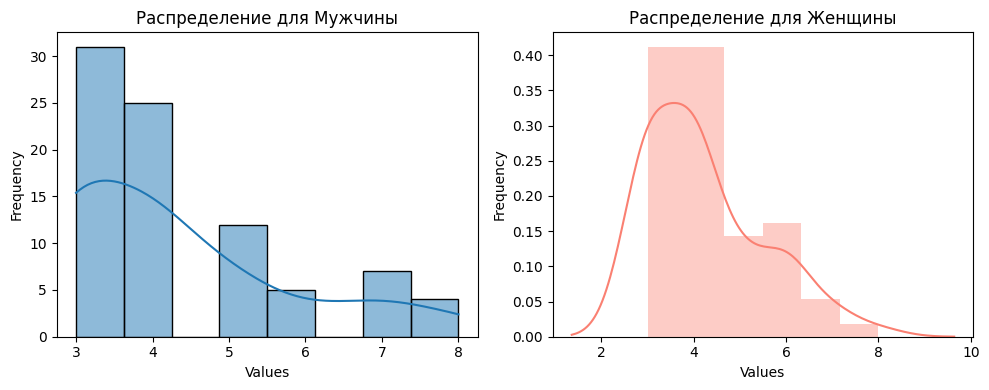

Описательнпая статистика выборок:

Мужчины
 count    84.000000
mean      4.333333
std       1.475367
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64 

Женщины
 count    67.000000
mean      4.238806
std       1.268375
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64


In [17]:
#Визуализация графиков и описательной статисики 
distplot_stat(x=men,y=women,title_x='Мужчины',title_y='Женщины')

Распределения выборок для мужчин и женщин проявляют высокую степень схожести, характеризуясь аналогичными значениями, средними показателями и почти идентичными дисперсиями. Эта аналогия дополнительно подтверждается результатами описательной статистики.

Тем не менее, важно отметить, что распределения обеих выборок оказываются малопохожими на нормальные. Исходя из этого, использование t-теста для независимых выборок не представляется оптимальным. Вместо этого, целесообразным выбором является применение U-критерия Манна-Уитни, который эффективен при работе с выборками, не подчиняющимися нормальному распределению.







In [49]:
# Проведение U-теста
U_test(x=men,y=women,alpha=0.05)

Статистика U: 2829.0
P-значение: 0.9548173130538878
Уровень значимости: 0.05
Нет статистически значимого различия между выборками - гипотеза отвергается.


## Гипотеза 2

Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

In [50]:
# Выборки больничных дней для старших (35+) и младших  (35-) сотрудников
older = data[(data['Возраст'] > 35) & (data['Количество больничных дней'] > 2)]['Количество больничных дней']
younger = data[(data['Возраст'] <= 35) & (data['Количество больничных дней'] > 2)]['Количество больничных дней']

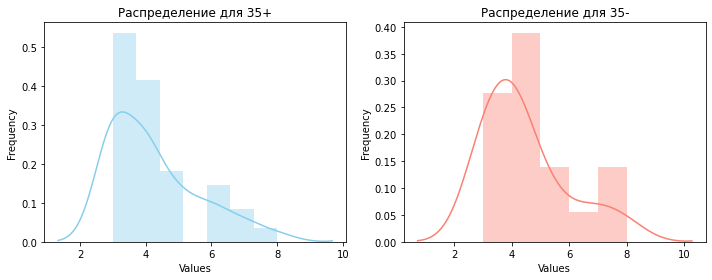

Описательнпая статистика выборок:

35+
 count    115.000000
mean       4.243478
std        1.361058
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: Количество больничных дней, dtype: float64 

35-
 count    36.000000
mean      4.444444
std       1.462765
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64


In [51]:
# Визуализация графиков и описательной статисики 
distplot_stat(x=older,y=younger,title_x='35+',title_y='35-')

Аналогично предыдущему случаю, выборки обладают схожими характеристиками, выраженными в сходстве распределений на одинаковых значениях, близких средних и дисперсиях. Кроме того, данные выборки не соответствуют нормальному распределению.

Исходя из указанных обстоятельств, решено так же применить U-тест Манна-Уитни для проведения анализа, поскольку этот метод является более подходящим при работе с выборками, не подчиняющимися нормальному распределению.

In [52]:
# Проведение U-теста
U_test(x=older,y=younger,alpha=0.05)

Статистика U: 1888.0
P-значение: 0.408297183958816
Уровень значимости: 0.05
Нет статистически значимого различия между выборками - гипотеза отвергается.
